## Практическое задание

- C помощью первого способа и автоматической расстановки цвета постройте такой же график с помощью функции scatter, как на уроке, сгруппировав данные по колонке neighbourhood (мы использовали в примере neighbourhood_group).
- C помощью одного вызова функции scatter постройте точки по координатам, использовав при этом в качестве цвета колонку availability_365, для отображения соответствия цвета значения используйте функцию colorbar.
- Используйте пример из урока по функции bar и измените группировку: покажите количество жилья разных типов по административному округу (neighbourhood_group).
- Повторите то же самое, что делали на уроке с hist, для number_reviews.
- Используйте boxplot для визуализации распределения number_reviews по neighbourhood_group.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/AB_NYC_2019.csv')

In [3]:
data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [4]:
data.fillna({'reviews_per_month': 0}, inplace=True)

## 1

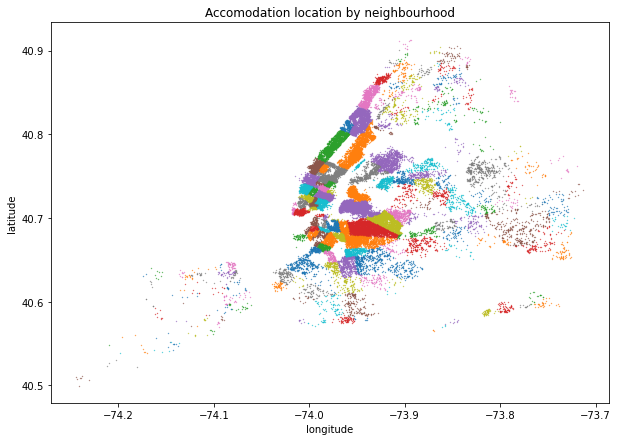

In [5]:
plt.figure(figsize=(10, 7))
for name, group in data.groupby(['neighbourhood']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')    
plt.title('Accomodation location by neighbourhood')
plt.show()

<!DOCTYPE html>
<html>
    <head>
        <meta charset="utf-8">
        <style>
            figure {
                width: 50%;
                height: 10%;
                float: left;
                margin: 0 0 10% 0
                }
            figure img {
                width: 50%;
                height: 50%;
                object-fit: cover;
                }
            ul {padding: 0 0 50 0; margin-left: 40; text-indent: 20px}
        </style>
<figure>
    <title><ul><ul><ul><ul><ul><ul><ul><ul><b>New Yor City Map</b></ul></ul></ul></ul></ul></ul></ul></ul></title>
    <img src="img/New_York_City_.png" alt="New York City" width="560" height="50" >
</figure>

## 2

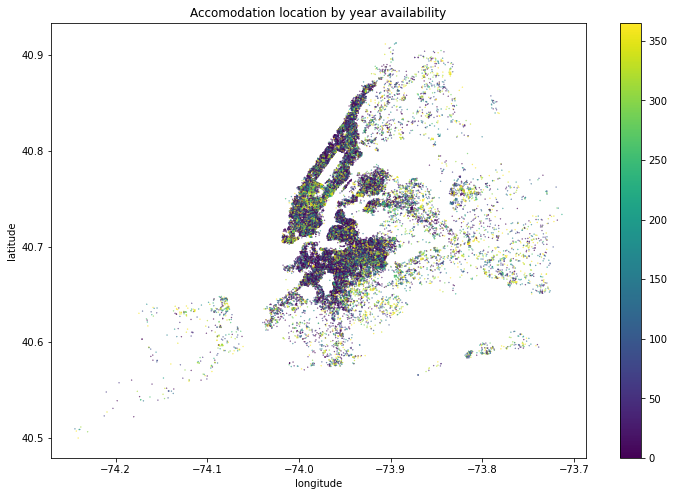

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], s=0.1, c=data['availability_365'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
plt.title('Accomodation location by year availability')
plt.show()

## 3

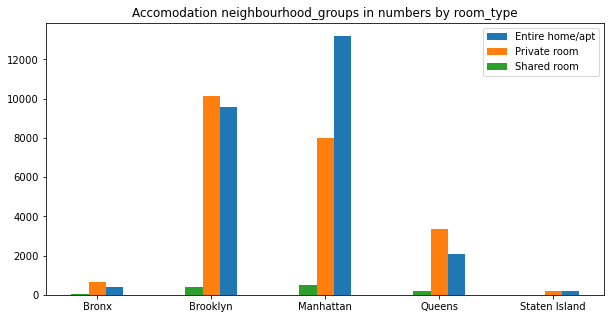

In [7]:
plt.figure(figsize=(10, 5))
x = np.asarray([0, 1, 2, 3, 4])
width = 0.15
i = -1
for name, group in data.groupby(['room_type']):
    plt.bar(x - i*width, group.groupby('neighbourhood_group').size().values, width, label=name)
    i += 1
plt.title('Accomodation neighbourhood_groups in numbers by room_type')
plt.xticks(x, list(data.groupby('neighbourhood_group').groups.keys()))
plt.legend()
plt.show()

## 4

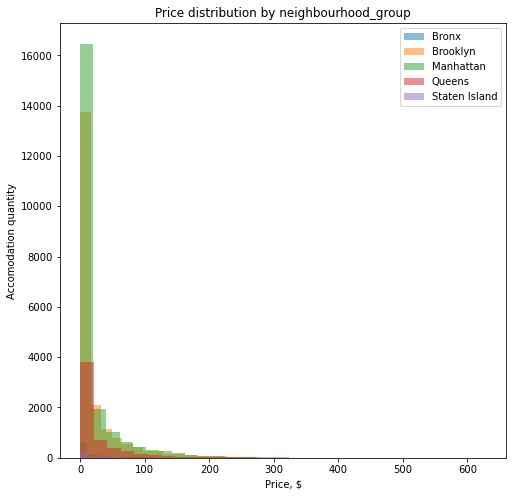

In [8]:
plt.figure(figsize=(8, 8))
index=1
for name, group in data.groupby(['neighbourhood_group']):
    plt.hist(group['number_of_reviews'], label=name, bins=30, alpha=0.5)
    index += 1
plt.xlabel('Price, $')
plt.ylabel('Accomodation quantity')
plt.title('Price distribution by neighbourhood_group')
plt.legend()
plt.show()

## 5

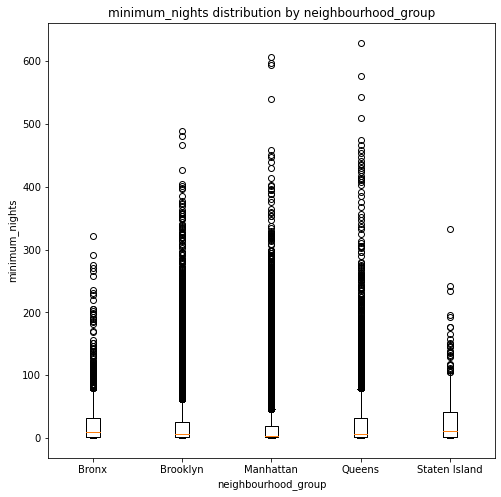

In [9]:
plt.figure(figsize=(8, 8))
index=1
for name, group in data.groupby(['neighbourhood_group']):
    plt.boxplot(group['number_of_reviews'], positions=[index], labels=[name])
    index += 1
plt.xlabel('neighbourhood_group')
plt.ylabel('minimum_nights')
plt.title('minimum_nights distribution by neighbourhood_group')
plt.show()